# Problem Statement:
Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records



FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

In [1]:
#Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore #to remove outliers
from scipy.stats import skew
import requests
import pandas_profiling
import io
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing dataset

In [4]:
df = pd.read_excel("Final_Train.xlsx")

# eda

In [5]:
df.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [6]:
df.shape # check the data dimension

(5961, 7)

In [7]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [8]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [10]:
df.columns # check the column names for EDA

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [11]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


## handle categorical data

In [12]:
#categorical columns in the dataset are as follows:
#Qualification
#Experience
#Rating
#Place 
#Profile
#Miscellaneous_Info

In [13]:
#experience column

In [14]:
for i in range(0,len(df)):
    df["Experience"][i] = df["Experience"][i][0:2]

In [15]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [16]:
#Place column - listing places by state can help in label encoding

In [17]:
df[["locality", "state", "extra"]] = df["Place"].str.split(", ", expand = True)

In [18]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,locality,state,extra
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,None
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,None
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,None
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,None
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,None
...,...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Basavanagudi,Bangalore,None
5957,MBBS,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,Nungambakkam,Chennai,None
5958,MBBS,41,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Greater Kailash Part 2,Delhi,None
5959,"MBBS, MD - General Medicine",15,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,Vileparle West,Mumbai,None


In [19]:
df.drop(columns=["locality","extra","Place"], axis=1, inplace= True)

In [20]:
df

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,state
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,NaN,300,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,BAMS,20,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98%,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore
5957,MBBS,33,NaN,General Medicine,NaN,100,Chennai
5958,MBBS,41,97%,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi
5959,"MBBS, MD - General Medicine",15,90%,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai


In [21]:
#dropping Miscellaneous_Info column
df.drop(columns=["Miscellaneous_Info"], axis=1, inplace= True)

In [22]:
df

,Qualification,Experience,Rating,Profile,Fees,state
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Ayurveda,350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,300,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,250,Bangalore
4,BAMS,20,100%,Ayurveda,250,Chennai
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98%,ENT Specialist,300,Bangalore
5957,MBBS,33,NaN,General Medicine,100,Chennai
5958,MBBS,41,97%,General Medicine,600,Delhi
5959,"MBBS, MD - General Medicine",15,90%,General Medicine,100,Mumbai


In [23]:
df[['Experience']] = df[['Experience']].apply(pd.to_numeric)

In [24]:
df[["rating%", "extra"]] = df["Rating"].str.split("%", expand = True)

In [25]:
df.drop(columns= "Rating", axis=1, inplace= True)

In [26]:
df

,Qualification,Experience,Profile,Fees,state,rating%,extra
0,"BHMS, MD - Homeopathy",24,Homeopath,100,Ernakulam,100,
1,"BAMS, MD - Ayurveda Medicine",12,Ayurveda,350,Bangalore,98,
2,"MBBS, MS - Otorhinolaryngology",9,ENT Specialist,300,Bangalore,NaN,NaN
3,"BSc - Zoology, BAMS",12,Ayurveda,250,Bangalore,NaN,NaN
4,BAMS,20,Ayurveda,250,Chennai,100,
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,ENT Specialist,300,Bangalore,98,
5957,MBBS,33,General Medicine,100,Chennai,NaN,NaN
5958,MBBS,41,General Medicine,600,Delhi,97,
5959,"MBBS, MD - General Medicine",15,General Medicine,100,Mumbai,90,


In [27]:
df['rating%'] = df['rating%'].fillna(value = 0)

In [28]:
df[['rating%']] = df[['rating%']].apply(pd.to_numeric)

In [29]:
df.drop(columns="extra", axis=1, inplace= True)

In [30]:
df.head()

,Qualification,Experience,Profile,Fees,state,rating%
0,"BHMS, MD - Homeopathy",24,Homeopath,100,Ernakulam,100
1,"BAMS, MD - Ayurveda Medicine",12,Ayurveda,350,Bangalore,98
2,"MBBS, MS - Otorhinolaryngology",9,ENT Specialist,300,Bangalore,0
3,"BSc - Zoology, BAMS",12,Ayurveda,250,Bangalore,0
4,BAMS,20,Ayurveda,250,Chennai,100


In [31]:
#converting categorical columns to numeric
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df["Qualification"] = LE.fit_transform(df["Qualification"])
df["Profile"] = LE.fit_transform(df["Profile"])
df["state"] = LE.fit_transform(df["state"])

In [32]:
df.head(5)

,Qualification,Experience,Profile,Fees,state,rating%
0,401,24,5,100,4,100
1,73,12,0,350,0,98
2,1135,9,3,300,0,0
3,464,12,0,250,0,0
4,10,20,0,250,1,100


In [33]:
df.dtypes

Qualification    int32
Experience       int64
Profile          int32
Fees             int64
state            int32
rating%          int64
dtype: object

In [34]:
#EDA

In [38]:
#Checking the distribution of values of each column

Qualification


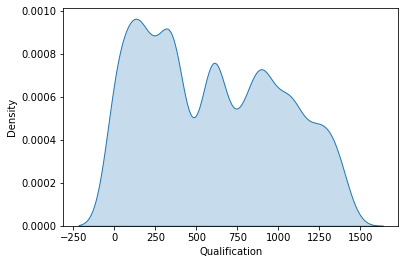

Experience


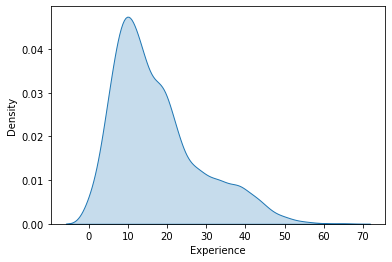

Profile


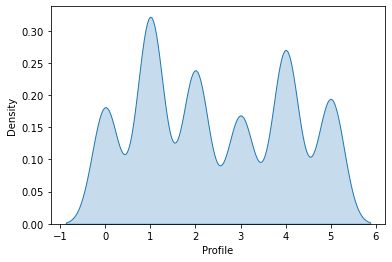

Fees


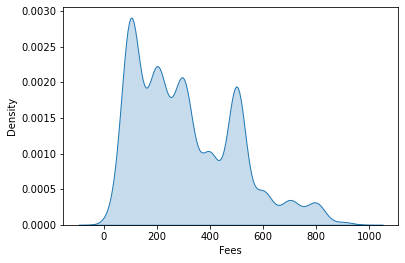

state


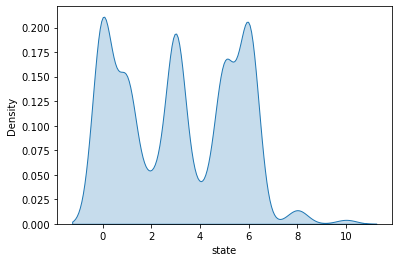

rating%


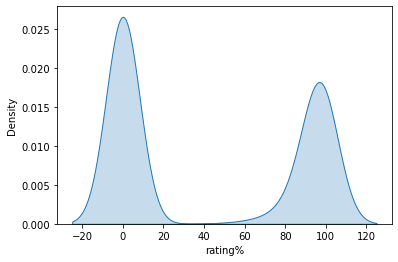

In [39]:
for col in df:
    print(col)
    
    plt.figure()
    sns.kdeplot(df[col], shade = True)
    plt.show()

In [40]:
#Checking the distribution of values of each column

Qualification


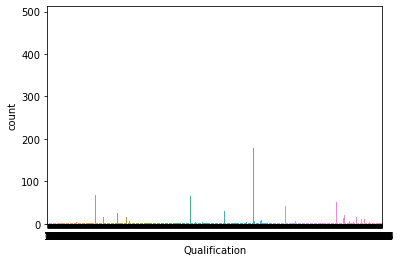

Experience


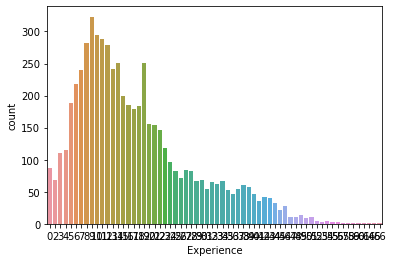

Profile


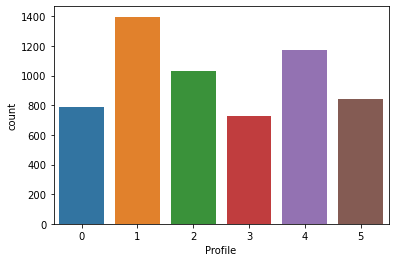

Fees


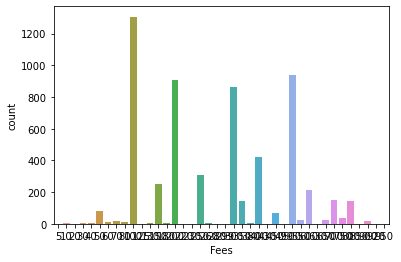

state


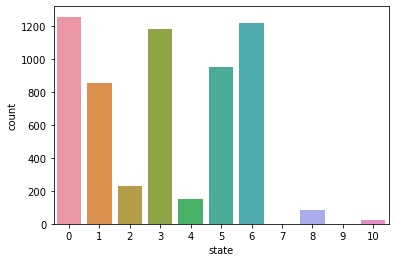

rating%


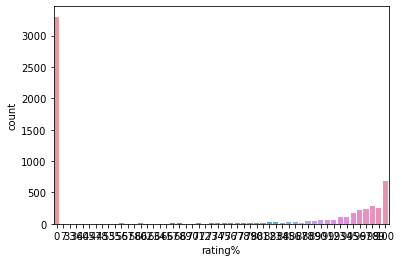

In [41]:
for col in df:
    print(col)
    
    plt.figure()
    sns.countplot(df[col])
    plt.show()

In [42]:
df.columns

Index(['Qualification', 'Experience', 'Profile', 'Fees', 'state', 'rating%'], dtype='object')

In [43]:
pre_profile = df.profile_report(title="doctor fee")
#pre_profile.to_file(output_file="avocado.html")

In [44]:
pre_profile

## check for outliers

In [45]:
#remove outliers before skewness check and before x, y split

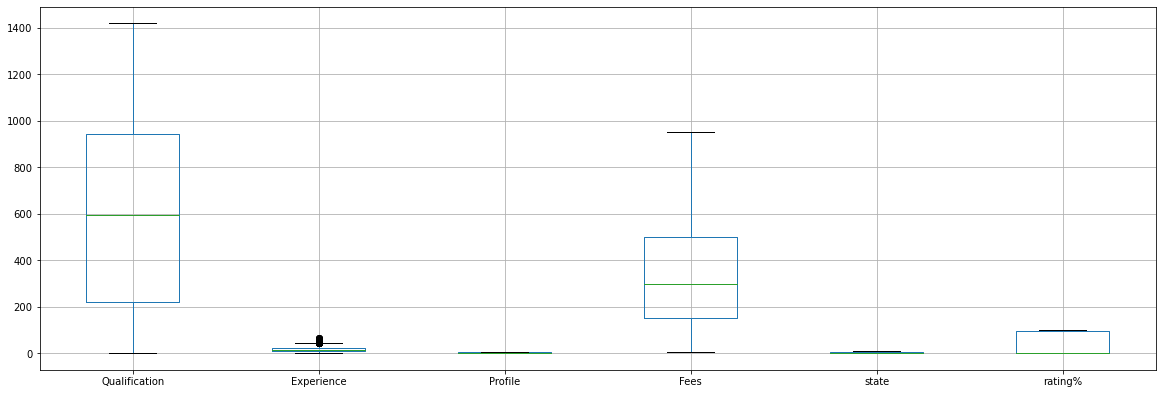

In [46]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [47]:
#Removing outliers by z score

In [48]:
from scipy.stats import zscore
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis=1)]

In [49]:
new_df.shape

(5903, 6)

In [50]:
df.shape

(5961, 6)

In [51]:
dataloss = ((5961-5903)/5961)*100

In [52]:
dataloss

0.9729911088743499

In [53]:
#Data loss is negligible, hence dropping outliers
df = new_df

## check co-relation

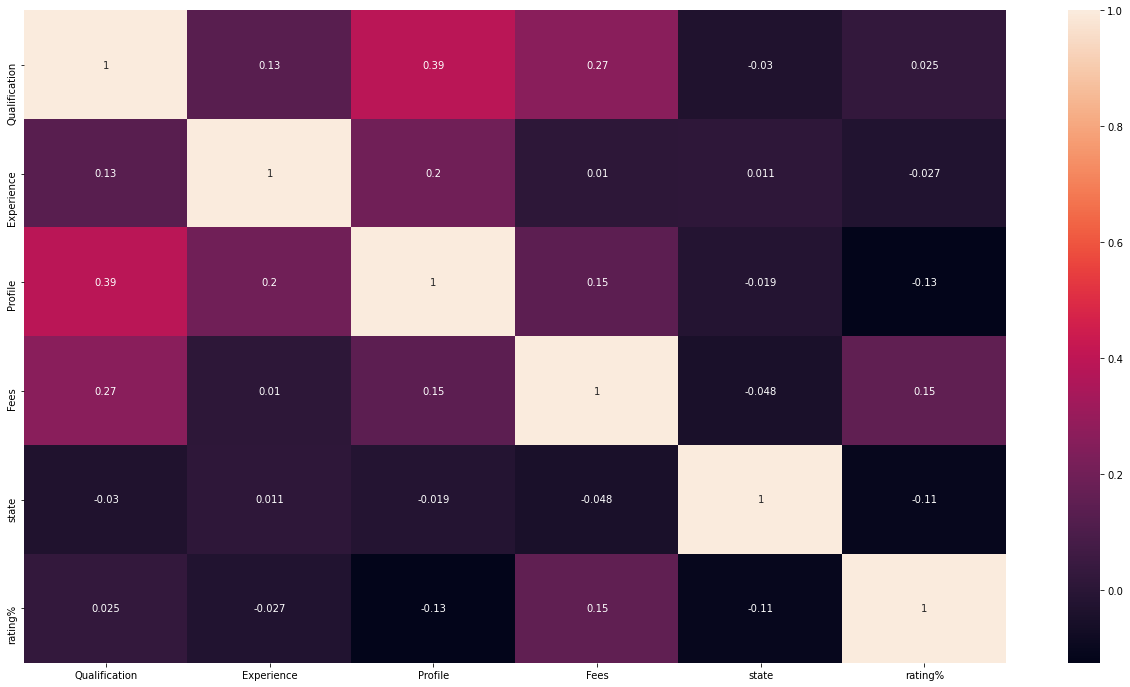

In [54]:
plt.figure(figsize=[22,12])
cor = df.corr()
sns.heatmap(cor, annot = True)
plt.show()

In [55]:
#Arrange co-relation in descending order. Dropping columns should be the last option to prevent data loss.

In [56]:
cor["Fees"].sort_values(ascending=False)

Fees             1.000000
Qualification    0.265037
rating%          0.151975
Profile          0.145418
Experience       0.010060
state           -0.048469
Name: Fees, dtype: float64

In [57]:
df.columns

Index(['Qualification', 'Experience', 'Profile', 'Fees', 'state', 'rating%'], dtype='object')

In [58]:
columns = ['Qualification', 'Experience', 'Profile', 'Fees', 'state', 'rating%']

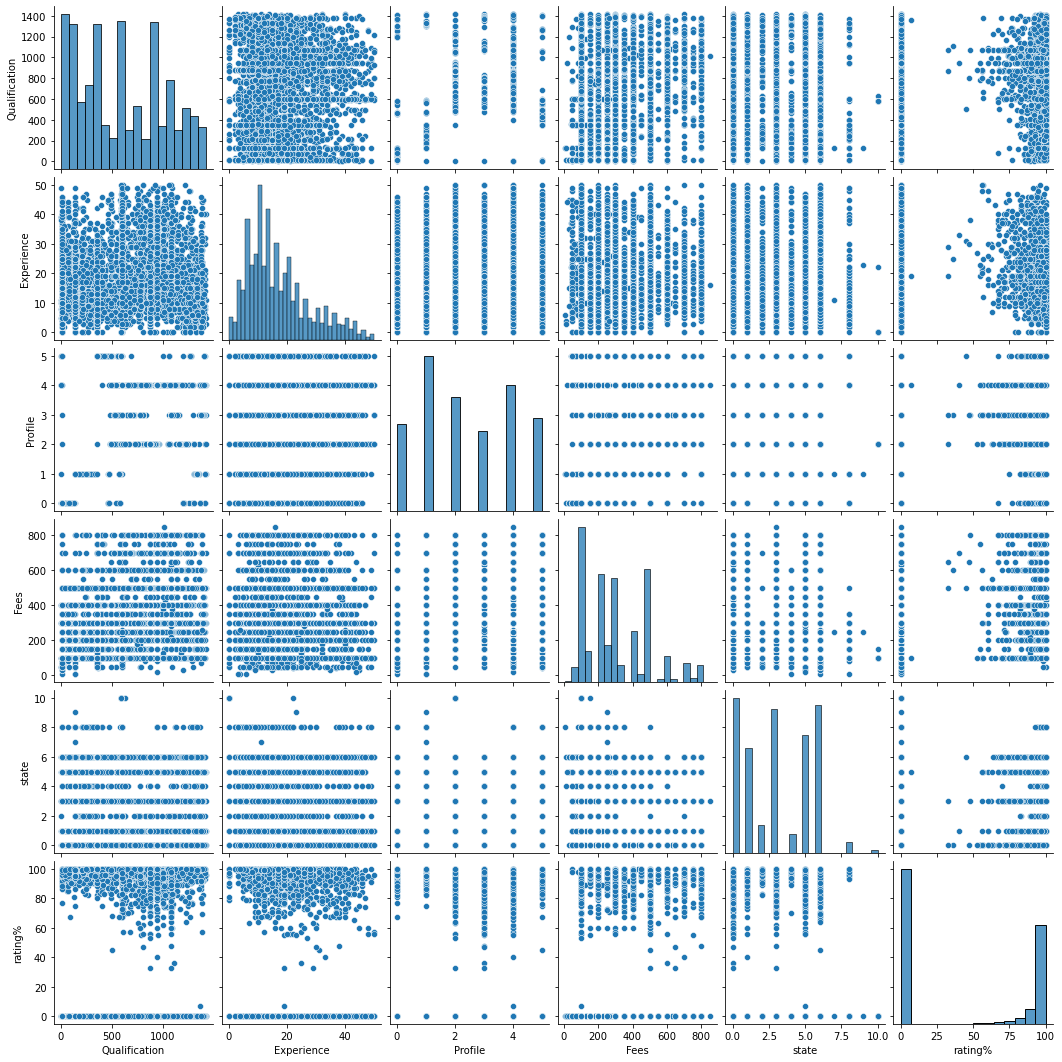

In [59]:
sns.pairplot(df[columns])

## check for skewness

In [60]:
x = df.drop('Fees',axis=1)
y = df['Fees']

Qualification
0.24679410390165976


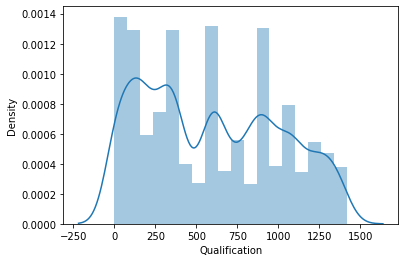

Experience
0.8974323850003707


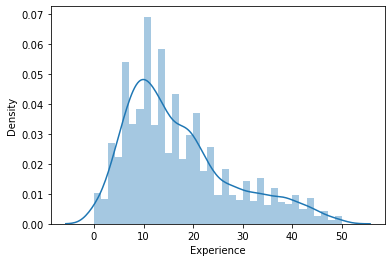

Profile
0.12130476783871443


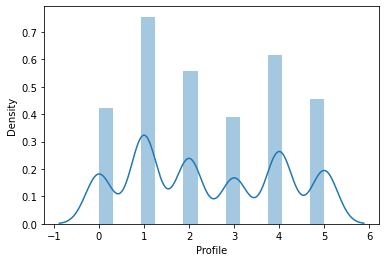

Fees
0.710264458635595


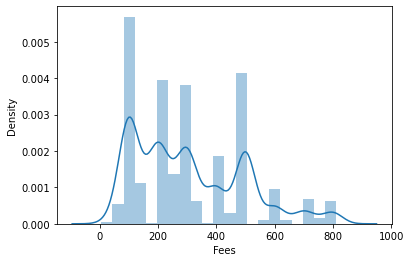

state
0.11443892641696775


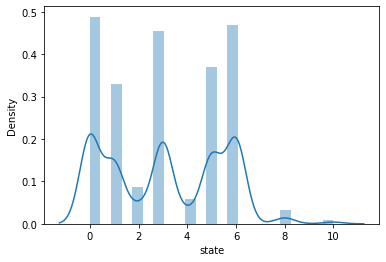

rating%
0.24090814142826758


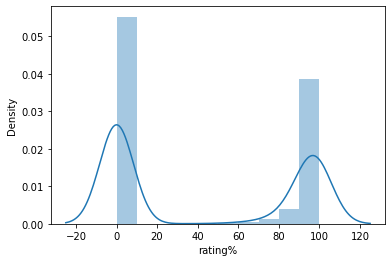

In [61]:
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [62]:
x.skew() # check skewness

Qualification    0.246857
Experience       0.897661
Profile          0.121336
state            0.114468
rating%          0.240969
dtype: float64

In [63]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns = x.columns)

In [64]:
df_new.skew()

Qualification   -0.296582
Experience      -0.005040
Profile         -0.135655
state           -0.192453
rating%          0.212456
dtype: float64

In [65]:
df_new

,Qualification,Experience,Profile,state,rating%
0,-0.260855,0.764737,1.421480,0.485194,1.129427
1,-1.392807,-0.320308,-1.642757,-1.448689,1.123162
2,1.173920,-0.687451,0.426746,-1.448689,-0.899845
3,-0.105429,-0.320308,-1.642757,-1.448689,-0.899845
4,-1.873701,0.449495,-1.642757,-0.816344,1.129427
...,...,...,...,...,...
5898,1.077112,0.364836,0.426746,-1.448689,1.123162
5899,0.191973,1.372369,0.945060,-0.816344,-0.899845
5900,0.191973,1.831576,0.945060,0.106083,1.119975
5901,0.855110,-0.003584,0.945060,1.151487,1.096575


In [66]:
x

,Qualification,Experience,Profile,state,rating%
0,401,24,5,4,100
1,73,12,0,0,98
2,1135,9,3,0,0
3,464,12,0,0,0
4,10,20,0,1,100
...,...,...,...,...,...
5956,1075,19,3,0,98
5957,596,33,4,1,0
5958,596,41,4,3,97
5959,943,15,4,6,90


In [67]:
x = df_new

## test train split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## regression

In [69]:
#Linear Regression

Coefficients: 
 [42.49952807 -1.03893529 12.08092897 -2.85316085 30.38469173]
MAE: 146.92600283996785
MSE: 32325.888290182313
RMSE: 179.79401628024863
Variance: 0.09708116589905535


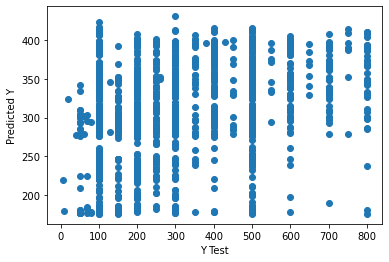

In [70]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
print('Coefficients: \n', lm.coef_)
predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Variance:',metrics.explained_variance_score(y_test, predictions))

In [71]:
from sklearn.linear_model import Lasso, Ridge

In [72]:
#alpha values could be .00001, .0001, 0.01,.1,1,10, higher values reduce all coefficients towards 0 and impact output
# default value of alpha is 0.01
ls = Lasso(alpha=0.00001)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)

0.09978165635289382

In [73]:
ls.coef_

array([42.49952303, -1.03892252, 12.08091851, -2.85315255, 30.3846816 ])

In [74]:
rd=Ridge(alpha=0.00001)
rd.fit(x_train, y_train)
rd.score(x_train, y_train)

0.09978165635290714

In [75]:
rd.coef_

array([42.49952796, -1.03893528, 12.08092899, -2.85316085, 30.38469167])

In [76]:
#ElasticNet
from sklearn.linear_model import ElasticNet
enr = ElasticNet(alpha= 0.00001)
enr.fit(x_train, y_train)
enr.score(x_train, y_train)

0.09978165635089531

In [77]:
enr.coef_

array([42.49929296, -1.0388975 , 12.08096704, -2.8531658 , 30.38455146])

In [78]:
#CatBoostRegressor

0:	learn: 179.7732261	total: 146ms	remaining: 1.31s
1:	learn: 176.8972654	total: 147ms	remaining: 590ms
2:	learn: 175.5203125	total: 149ms	remaining: 347ms
3:	learn: 174.7103565	total: 150ms	remaining: 224ms
4:	learn: 174.1202738	total: 151ms	remaining: 151ms
5:	learn: 173.4497337	total: 152ms	remaining: 101ms
6:	learn: 172.4039976	total: 153ms	remaining: 65.7ms
7:	learn: 172.2410543	total: 154ms	remaining: 38.6ms
8:	learn: 171.6171032	total: 156ms	remaining: 17.3ms
9:	learn: 170.9821213	total: 157ms	remaining: 0us
MAE: 137.63822021418446
MSE: 29530.776523201825
RMSE: 171.84521094054912
R2 Score 0.17483956162582104
Variance: 0.17512523558118798


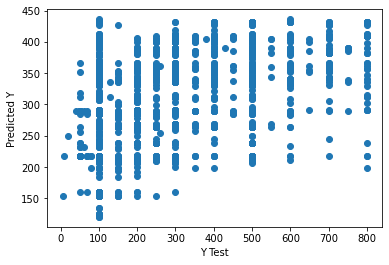

In [79]:
from catboost import CatBoostRegressor
# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=10,learning_rate=0.5,depth=2)
# Fit model
model.fit(x_train,y_train)
# Get predictions
preds = model.predict(x_test)

plt.scatter(y_test,preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R2 Score', r2_score(y_test, preds))
print('Variance:',metrics.explained_variance_score(y_test, preds))

In [80]:
#decisiontreeregressor

MAE: 140.56689338485697
MSE: 30903.489377013604
RMSE: 175.793883218426
Variance: 0.13695968829901306
R2 Score: 0.13648268539118324


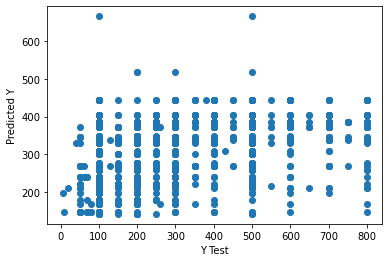

In [81]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x_train,y_train)

# Predict
preds = regr_1.predict(x_test)

# Plot the results
plt.scatter(y_test,preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))
print('R2 Score:',metrics.r2_score(y_test, preds))

## hyper parameter tuning

In [82]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(x_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 4, 'min_samples_split': 20}
30108.112480018997


In [83]:
new_model = DecisionTreeRegressor(max_depth=4,
                                  min_samples_split=20)
new_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_split=20)

## working on the test data

In [84]:
x_test = pd.read_excel("Final_Test.xlsx")

# eda

In [85]:
x_test.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
5,"BDS, MDS",14 years experience,90%,"Velachery, Chennai",Dentist,Acrylic Partial Denture Impaction / Impacted T...
6,"MBBS, Diploma in Otorhinolaryngology (DLO)",23 years experience,94%,"Frazer Town, Bangalore",ENT Specialist,"94% 6 Feedback Frazer Town, Bangalore"
7,"BDS, MDS - Pedodontics",9 years experience,94%,"Attapur, Hyderabad",Dentist,RCT - Root Canal Treatment Ceramic Veneers / C...
8,"MD - Ayurveda Medicine, BAMS, Yoga Teachers Tr...",11 years experience,99%,"Banashankari, Bangalore",Ayurveda,"99% 203 Feedback Banashankari, Bangalore"
9,BHMS,44 years experience,NaN,"Mayur Vihar Ph-I, Delhi",Homeopath,NaN


In [86]:
x_test.shape # check the data dimension

(1987, 6)

In [87]:
x_test.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [88]:
x_test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [89]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [90]:
x_test.columns # check the column names for EDA

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [91]:
x_test.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,1987,1987,897,1981,1987,1153
unique,630,57,36,592,6,1084
top,BAMS,10 years experience,100%,"Mulund West, Mumbai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...
freq,153,110,223,27,444,10


## handle categorical data

In [92]:
#categorical columns in the dataset are as follows:
#Qualification
#Experience
#Rating
#Place 
#Profile
#Miscellaneous_Info

In [93]:
#experience column

In [94]:
x_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [95]:
for i in range(0,len(x_test)):
    x_test["Experience"][i] = x_test["Experience"][i][0:2]

In [96]:
x_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [97]:
#Place column - listing places by state can help in label encoding

In [98]:
x_test[["locality", "state"]] = x_test["Place"].str.split(", ", expand = True)

In [99]:
x_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,locality,state
0,MBBS,35,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,West Marredpally,Hyderabad
2,"MBBS, DDVL",40,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",KK Nagar,Chennai
3,BAMS,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,Kanakpura Road,Bangalore
...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,Basavanagudi,Bangalore
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,NaN,"Choolai, Chennai",Dermatologists,NaN,Choolai,Chennai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,NaN,"Porur, Chennai",General Medicine,NaN,Porur,Chennai
1985,BDS,12,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,Arekere,Bangalore


In [100]:
x_test.drop(columns=["locality","Place"], axis=1, inplace= True)

In [101]:
x_test

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,state
0,MBBS,35,NaN,General Medicine,NaN,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,ENT Specialist,NaN,Hyderabad
2,"MBBS, DDVL",40,70%,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai
3,BAMS,0,NaN,Ayurveda,NaN,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,NaN,Ayurveda,NaN,Bangalore
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,NaN,Dermatologists,NaN,Chennai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,NaN,General Medicine,NaN,Chennai
1985,BDS,12,98%,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,Bangalore


In [102]:
#dropping Miscellaneous_Info column
x_test.drop(columns=["Miscellaneous_Info"], axis=1, inplace= True)

In [103]:
x_test

,Qualification,Experience,Rating,Profile,state
0,MBBS,35,NaN,General Medicine,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,ENT Specialist,Hyderabad
2,"MBBS, DDVL",40,70%,Dermatologists,Chennai
3,BAMS,0,NaN,Ayurveda,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,Dentist,Bangalore
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,NaN,Ayurveda,Bangalore
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,NaN,Dermatologists,Chennai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,NaN,General Medicine,Chennai
1985,BDS,12,98%,Dentist,Bangalore


In [104]:
x_test[['Experience']] = x_test[['Experience']].apply(pd.to_numeric)

In [105]:
x_test[["rating%", "extra"]] = x_test["Rating"].str.split("%", expand = True)

In [106]:
x_test.drop(columns= "Rating", axis=1, inplace= True)

In [107]:
x_test

,Qualification,Experience,Profile,state,rating%,extra
0,MBBS,35,General Medicine,Mumbai,NaN,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,ENT Specialist,Hyderabad,NaN,NaN
2,"MBBS, DDVL",40,Dermatologists,Chennai,70,
3,BAMS,0,Ayurveda,Delhi,NaN,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,Dentist,Bangalore,100,
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,Ayurveda,Bangalore,NaN,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,Dermatologists,Chennai,NaN,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,General Medicine,Chennai,NaN,NaN
1985,BDS,12,Dentist,Bangalore,98,


In [108]:
x_test['rating%'] = x_test['rating%'].fillna(value = 0)

In [109]:
x_test[['rating%']] = x_test[['rating%']].apply(pd.to_numeric)

In [110]:
x_test.drop(columns="extra", axis=1, inplace= True)

In [111]:
x_test.head()

,Qualification,Experience,Profile,state,rating%
0,MBBS,35,General Medicine,Mumbai,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,ENT Specialist,Hyderabad,0
2,"MBBS, DDVL",40,Dermatologists,Chennai,70
3,BAMS,0,Ayurveda,Delhi,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,Dentist,Bangalore,100


In [112]:
#converting categorical columns to numeric
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
x_test["Qualification"] = LE.fit_transform(x_test["Qualification"])
x_test["Profile"] = LE.fit_transform(x_test["Profile"])
x_test["state"] = LE.fit_transform(x_test["state"])

In [113]:
x_test.head(5)

,Qualification,Experience,Profile,state,rating%
0,241,35,4,6,0
1,340,31,3,5,0
2,258,40,2,1,70
3,6,0,0,3,0
4,79,16,1,0,100


In [114]:
x_test.dtypes

Qualification    int32
Experience       int64
Profile          int32
state            int32
rating%          int64
dtype: object

## check for outliers

In [115]:
#remove outliers before skewness check and before x, y split

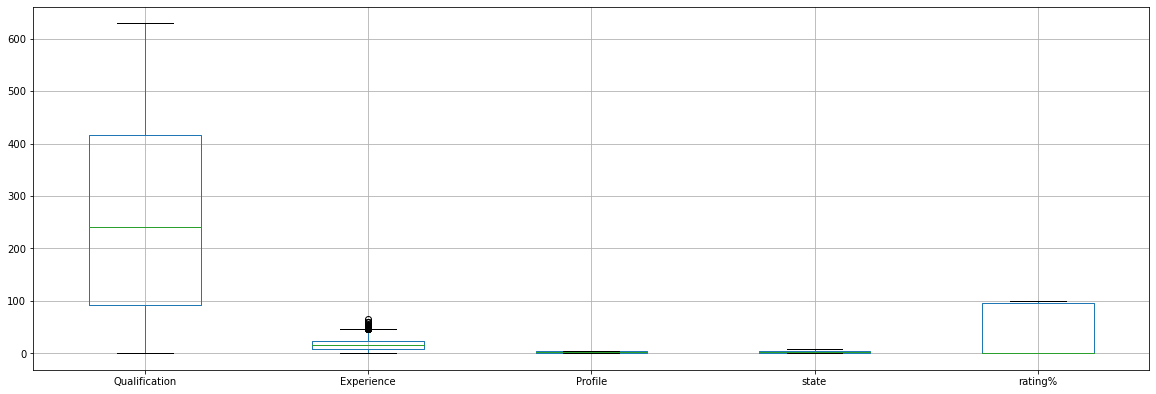

In [116]:
x_test.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [117]:
#Removing outliers by z score

In [118]:
from scipy.stats import zscore
z = np.abs(zscore(x_test))
new_df = x_test[(z<3).all(axis=1)]

In [119]:
new_df.shape

(1976, 5)

In [120]:
x_test.shape

(1987, 5)

In [121]:
dataloss = ((1987-1976)/1987)*100

In [122]:
dataloss

0.5535983895319577

In [123]:
#Data loss is negligible, hence dropping outliers
x_test = new_df

## check for skewness

In [124]:
x_test.skew() # check skewness

Qualification    0.284619
Experience       0.873380
Profile          0.031856
state            0.005814
rating%          0.227271
dtype: float64

In [125]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x_test)

df_new = pd.DataFrame(df_new, columns = x_test.columns)

In [126]:
df_new.skew()

Qualification   -0.262598
Experience      -0.005344
Profile         -0.161595
state           -0.217537
rating%          0.198616
dtype: float64

In [127]:
df_new

,Qualification,Experience,Profile,state,rating%
0,0.117591,1.432105,0.903854,1.208389,-0.906021
1,0.564017,1.185222,0.365275,0.869269,-0.906021
2,0.199871,1.717909,-0.220041,-0.825987,1.007289
3,-1.832641,-2.754710,-1.653488,0.112266,-0.906021
4,-0.889467,0.033508,-0.874775,-1.447660,1.122749
...,...,...,...,...,...
1971,-1.595947,-0.612235,-1.653488,-1.447660,-0.906021
1972,1.329073,-1.540750,-0.220041,-0.825987,-0.906021
1973,1.076495,-0.739867,0.903854,-0.825987,-0.906021
1974,-1.151147,-0.377022,-0.874775,-1.447660,1.116339


In [128]:
x_test

,Qualification,Experience,Profile,state,rating%
0,241,35,4,6,0
1,340,31,3,5,0
2,258,40,2,1,70
3,6,0,0,3,0
4,79,16,1,0,100
...,...,...,...,...,...
1982,17,10,0,0,0
1983,548,4,2,1,0
1984,474,9,4,1,0
1985,51,12,1,0,98


In [129]:
x_test = df_new

In [130]:
new_model = DecisionTreeRegressor(max_depth=4, min_samples_split=20)
new_model.fit(x_train, y_train)
predictions = new_model.predict(x_test)

In [131]:
submission = pd.DataFrame()
submission['Fee']=  predictions
submission.head()

,Fee
0,348.876404
1,357.650677
2,210.803571
3,205.398458
4,280.993857


In [132]:
submission

,Fee
0,348.876404
1,357.650677
2,210.803571
3,205.398458
4,280.993857
...,...
1971,205.398458
1972,357.650677
1973,357.650677
1974,333.750000


In [133]:
submission.to_csv('submission.csv',index=False)